<a href="https://colab.research.google.com/github/m-d-nabeel/mnist-dataset/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Load data from kaggle; Comment these if already loaded
# !kaggle datasets download -d salader/dogs-vs-cats
# !unzip -q dogs-vs-cats.zip
# !rm -rf dogs-vs-cats.zip

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:43<00:00, 27.4MB/s]
100% 1.06G/1.06G [00:43<00:00, 26.2MB/s]


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalizing images
def normalize(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [5]:
# data_augmentation = Sequential([
#   keras.layers.RandomFlip("horizontal"),
#   keras.layers.RandomRotation(0.1),
#   keras.layers.RandomZoom(0.1),
# ])

# train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x), y))

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.25))

model.add(Dense(1, activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 127, 127, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                        

In [8]:
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=1e-3,
#     decay_steps=10000,
#     decay_rate=0.9
#   )

# optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

# model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
model.compile(optimizer=keras.optimizers.Adam(), loss="binary_crossentropy", metrics=["accuracy"])

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,          # Number of epochs to wait for improvement
    restore_best_weights=True  # Restore the best weights found during training
)

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=test_dataset,
    callbacks=[early_stopping]
)

Epoch 1/20
625/625 [==============================] - 69s 92ms/step - loss: 2.3909 - accuracy: 0.5667 - val_loss: 0.6434 - val_accuracy: 0.6420
Epoch 2/20
625/625 [==============================] - 56s 90ms/step - loss: 0.6405 - accuracy: 0.6385 - val_loss: 0.6573 - val_accuracy: 0.5506
Epoch 3/20
625/625 [==============================] - 59s 93ms/step - loss: 0.5715 - accuracy: 0.7079 - val_loss: 0.5641 - val_accuracy: 0.7168
Epoch 4/20
625/625 [==============================] - 57s 90ms/step - loss: 0.5127 - accuracy: 0.7502 - val_loss: 0.5168 - val_accuracy: 0.7394
Epoch 5/20
625/625 [==============================] - 55s 88ms/step - loss: 0.4624 - accuracy: 0.7824 - val_loss: 0.4874 - val_accuracy: 0.7670
Epoch 6/20
625/625 [==============================] - 60s 95ms/step - loss: 0.4101 - accuracy: 0.8141 - val_loss: 0.4413 - val_accuracy: 0.8122
Epoch 7/20
625/625 [==============================] - 59s 94ms/step - loss: 0.3596 - accuracy: 0.8397 - val_loss: 0.7710 - val_accuracy:

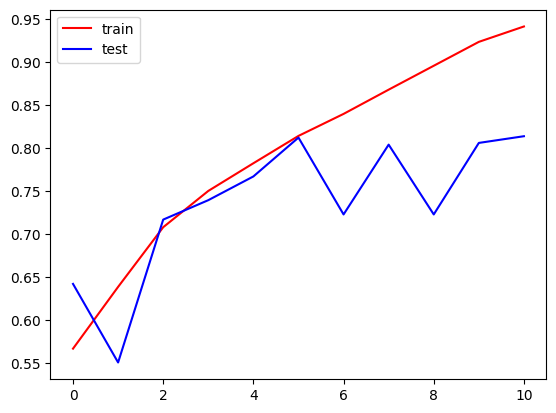

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="test")
plt.legend()
plt.show()

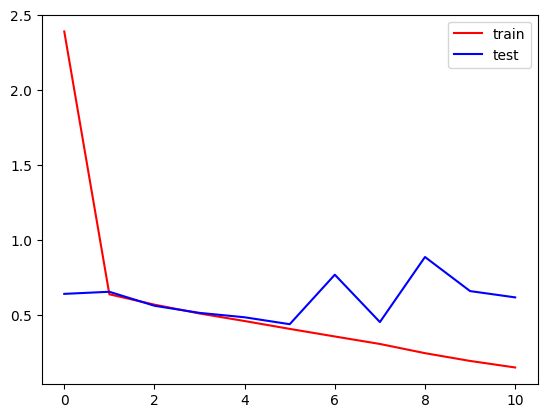

In [12]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="test")
plt.legend()
plt.show()

In [14]:
import requests
import cv2

In [55]:
def predict_file(link_to_image, label):
  img = cv2.imread(link_to_image)
  img = cv2.resize(img, (256, 256))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img / 255
  print(f"Actual => {label}")
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  prediction = model.predict(img)
  pred_val = 1 if prediction > 0.5 else 0
  print(f"Prediction = {pred_val} => {'Dog' if pred_val == 1 else 'Cat'}")

In [56]:
def predict_url(link_to_image, label):
  response = requests.get(link_to_image)
  with open(file="image.jpg", mode="wb") as f:
    f.write(response.content)
  img = cv2.imread("/content/image.jpg")
  img = cv2.resize(img, (256, 256))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img / 255
  print(f"Actual => {label}")
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  prediction = model.predict(img)
  pred_val = 1 if prediction > 0.5 else 0
  print(f"Prediction = {pred_val} => {'Dog' if pred_val == 1 else 'Cat'}")

Actual => Dog
1/1 [==============================] - 0s 20ms/step
Prediction = 1 => Dog


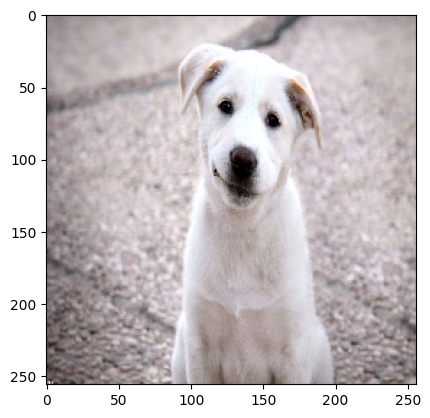

In [57]:
predict_url(
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwallup.net%2Fwp-content%2Fuploads%2F2014%2F10%2Fanimal%2FDog_Smile_Happy.jpg&f=1&nofb=1&ipt=458aa1381d850b4f3fc0464a8b09b84c538b3a4a66bdbac65c8dbce1bb5b4b67&ipo=images",
    "Dog"
)

Actual => Dog
1/1 [==============================] - 0s 29ms/step
Prediction = 1 => Dog


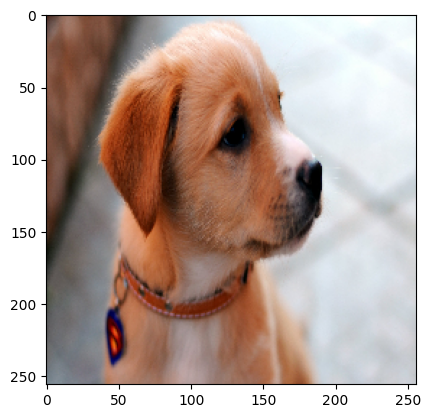

In [58]:
predict_url(
    "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Finspirationseek.com%2Fwp-content%2Fuploads%2F2016%2F02%2FCute-Dog-Images.jpg&f=1&nofb=1&ipt=77bba9b1d67bd3d2403942627a4bf9d4459dcbb2d06d9161c668aadef01c9e5e&ipo=images",
    "Dog"
)

Actual => Cat
1/1 [==============================] - 0s 18ms/step
Prediction = 0 => Cat


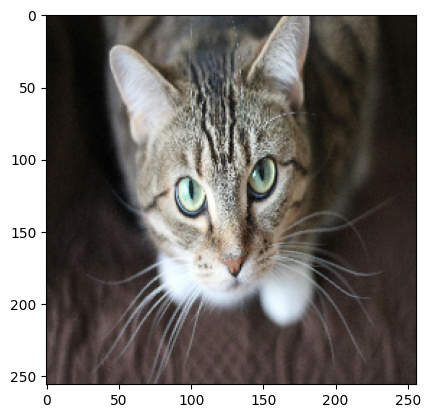

In [59]:
predict_url(
    "https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.pexels.com%2Fphotos%2F20787%2Fpexels-photo.jpg%3Fcs%3Dsrgb%26dl%3Danimal-cat-adorable-20787.jpg%26fm%3Djpg&f=1&nofb=1&ipt=1024465bed5355a2ede6f418a5eef21efcb701517bacaf7fbc587a18cc0ebe64&ipo=images",
    "Cat"
)

Actual => Cat
1/1 [==============================] - 0s 19ms/step
Prediction = 0 => Cat


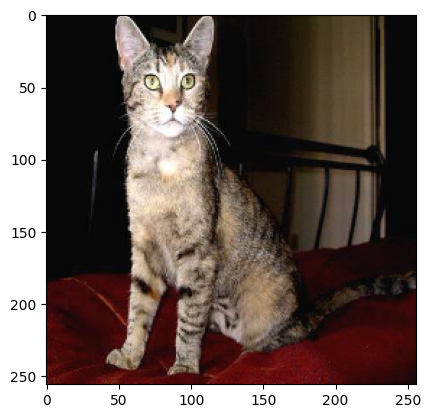

In [60]:
predict_file("/content/test/cats/cat.10000.jpg", "Cat")

1/1 [==============================] - 0s 110ms/step
The image is a Cat with a confidence of 0.32


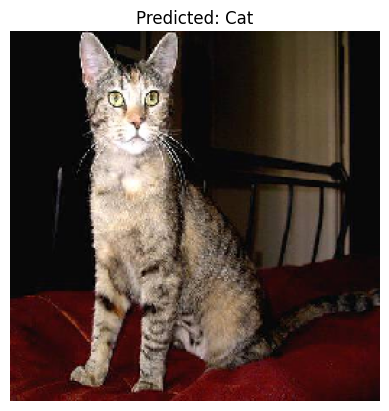

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)

    if prediction >= 0.5:
        label = 'Dog'
    else:
        label = 'Cat'

    print(f"The image is a {label} with a confidence of {prediction[0][0]:.2f}")

    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()

predict_image(model, "/content/test/dogs/cat.10000.jpg")

In [62]:
model.save("cat_dog_classifier_v20240614.h5")
model.save("cat_dog_classifier_v20240614.keras")

In [63]:
!ls -lh

total 341M
-rw-r--r-- 1 root root 170M Jun 14 18:35 cat_dog_classifier_v20240614.h5
-rw-r--r-- 1 root root 170M Jun 14 18:35 cat_dog_classifier_v20240614.keras
drwxr-xr-x 4 root root 4.0K Jun 14 17:45 dogs_vs_cats
-rw-r--r-- 1 root root 597K Jun 14 18:32 image.jpg
drwxr-xr-x 1 root root 4.0K Jun 13 13:28 sample_data
drwxr-xr-x 4 root root 4.0K Jun 14 17:45 test
drwxr-xr-x 4 root root 4.0K Jun 14 17:45 train
